### Trying A subsampled analysis

In [1]:
%reload_ext autoreload
%autoreload 2
from jokedictfuncs import *
from sklearn.utils.random import sample_without_replacement as sampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
table, data = Inspect.flattenDatasets()

In [12]:
len(table)

1143479

So that's a lot of datapoints for a single desktop machine. Let's sample 10K datapoints

In [44]:
indexes = sampler(len(table),10000)
table_sub = table.iloc[indexes]
data_sub = [x[0] for x in table_sub.values.tolist()]
table_sub

Data
id                                                       
i3kb1   a pirate walks into a bar with a steering whee...
3zsjnr  what can you put at the end of a sentence to m...
6ixzox  a fly hit my windshield --- and now there is t...
5b7lh7  nasa sends blonde to space --- nasa sends a sp...
2iov60  a buddy had a lawn mower accident and died aft...
...                                                   ...
14r2xi  why did the hipster burn his mustache on his c...
6onl8x   what do you call warm rain --- lukewarm skywater
6ag1f2                 teenage son comes running --- none
6szud2  im convinced the japanese military of wwii was...
4i630x  hey girl are you a league player --- cause fuc...

[10000 rows x 1 columns]

In [46]:
[len(table_sub), len(data_sub)]

[10000, 10000]

Nice, now let's do a quick analysis

In [47]:
X = Analysis.makeFeaturesIDF(data_sub)

In [48]:
X_redux = Analysis.dimensionReduction(X)

X.shape (10000, 10000)
X_redux.shape (10000, 50)


In [49]:
embed = Analysis.perform2DEmbed(X_redux)

This can take > 24 hours.


/nix/store/3v43k3m666wdzkkkrn9br7r5fnvzcpzf-python3-3.8.2-env/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../nix/store/3v43k3m666wdzkkkrn9br7r5fnvzcpzf-python3-3.8.2-env/lib/python3.8/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/nix/store/3v43k3m666wdzkkkrn9br7r5fnvzcpzf-python3-3.8.2-env/lib/python3.8/site-packages/umap/nndescent.py:91: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel 

embedding.shape (10000, 2)


In [54]:
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

Datapoints: 3169


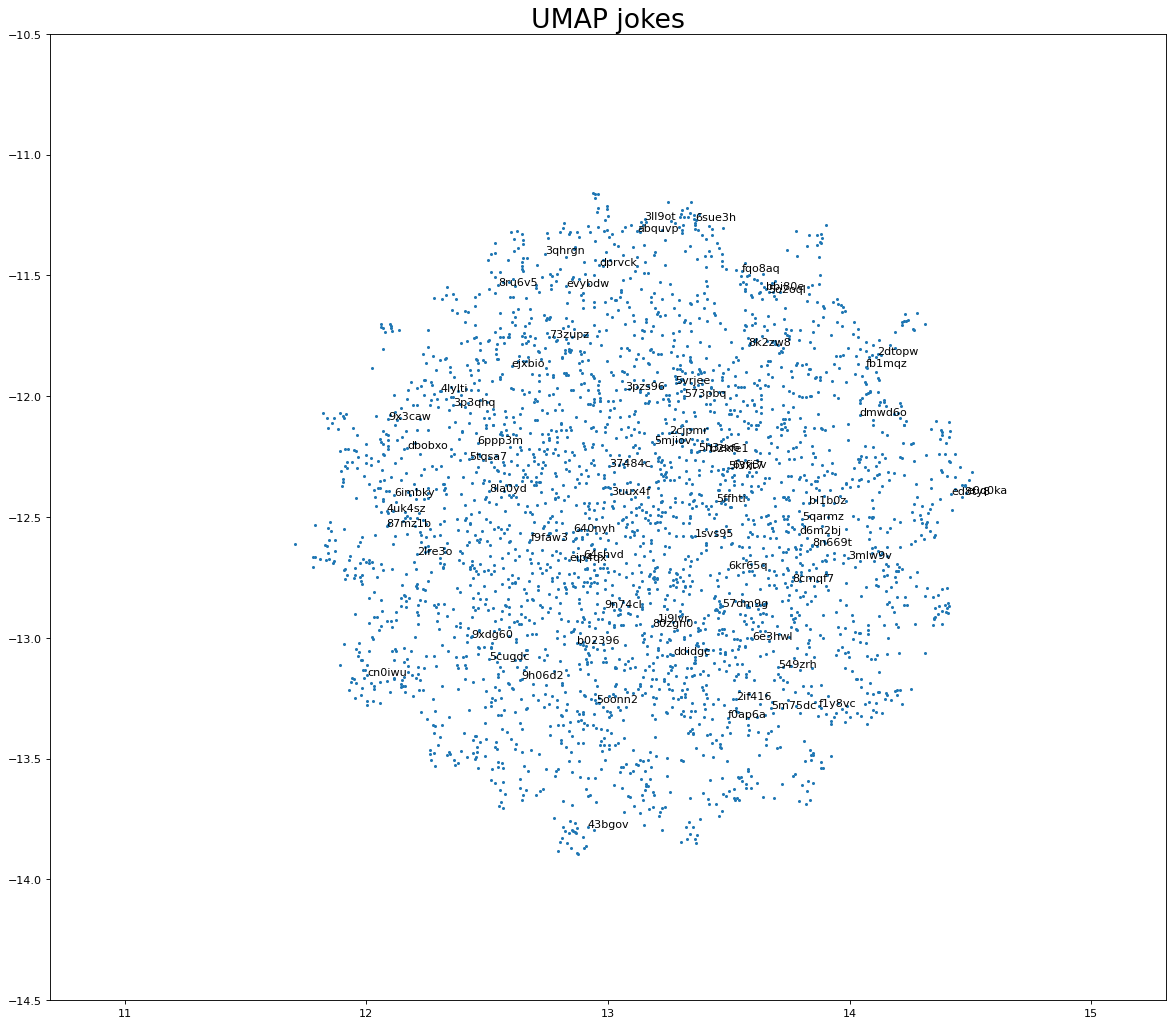

In [64]:
xlim=(11,15)
ylim=(-14.5,-10.5)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=3, 
                             xlim=xlim, ylim=ylim)

jokes_in_region = Analysis.annotatePlot(ax, embed, table_sub, xlim, ylim,
                                       every=50)

In [65]:
jokes_in_region

Data
id                                                       
bhm7bf  what is thanos least favorite symbol --- a che...
cin54y  i love fibonacci jokes --- each new one is as ...
gdmd9d  what do you call a vindictive jacket --- a pet...
6wib9h  what is beethoven currently doing --- decomposing
37xqiu  it was actually the muslims who invented the c...
...                                                   ...
4sd6ap                       theresa may --- theresa will
7ubbai      are you all alright --- no you are all alleft
5ubo33               what was einsteins rap name --- none
6onl8x   what do you call warm rain --- lukewarm skywater
6szud2  im convinced the japanese military of wwii was...

[3169 rows x 1 columns]

In [67]:
with open('test.data','wb') as frick:
    pickle.dump([table_sub, data_sub], frick)

Does not seem to be much similarity here... might have something to do with the sampling method, or it could do with the way the features are taken

### Same Data, Different Features

Same as above but with 100K features

X.shape (10000, 15029)
X_redux.shape (10000, 50)


/nix/store/3v43k3m666wdzkkkrn9br7r5fnvzcpzf-python3-3.8.2-env/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../nix/store/3v43k3m666wdzkkkrn9br7r5fnvzcpzf-python3-3.8.2-env/lib/python3.8/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/nix/store/3v43k3m666wdzkkkrn9br7r5fnvzcpzf-python3-3.8.2-env/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 12 separate connected components using meta-embedding (experimental)
  warn(


embedding.shape (10000, 2)


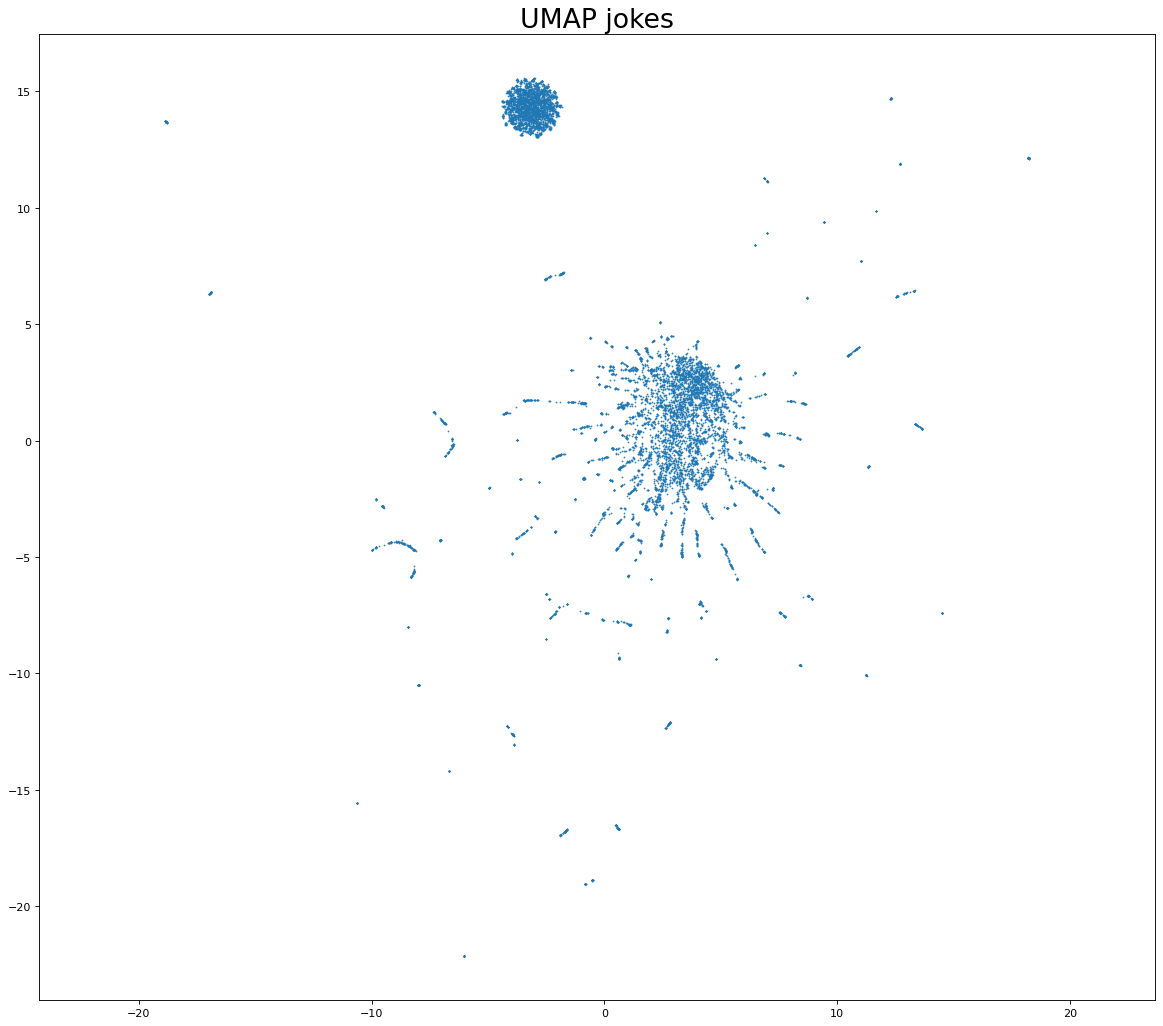

In [66]:
X = Analysis.makeFeaturesIDF(data_sub, max_features=100000)
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

Looks the same, increasing the features did not help

### Same Data, different higher and larger ngram range

X.shape (10000, 6082)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


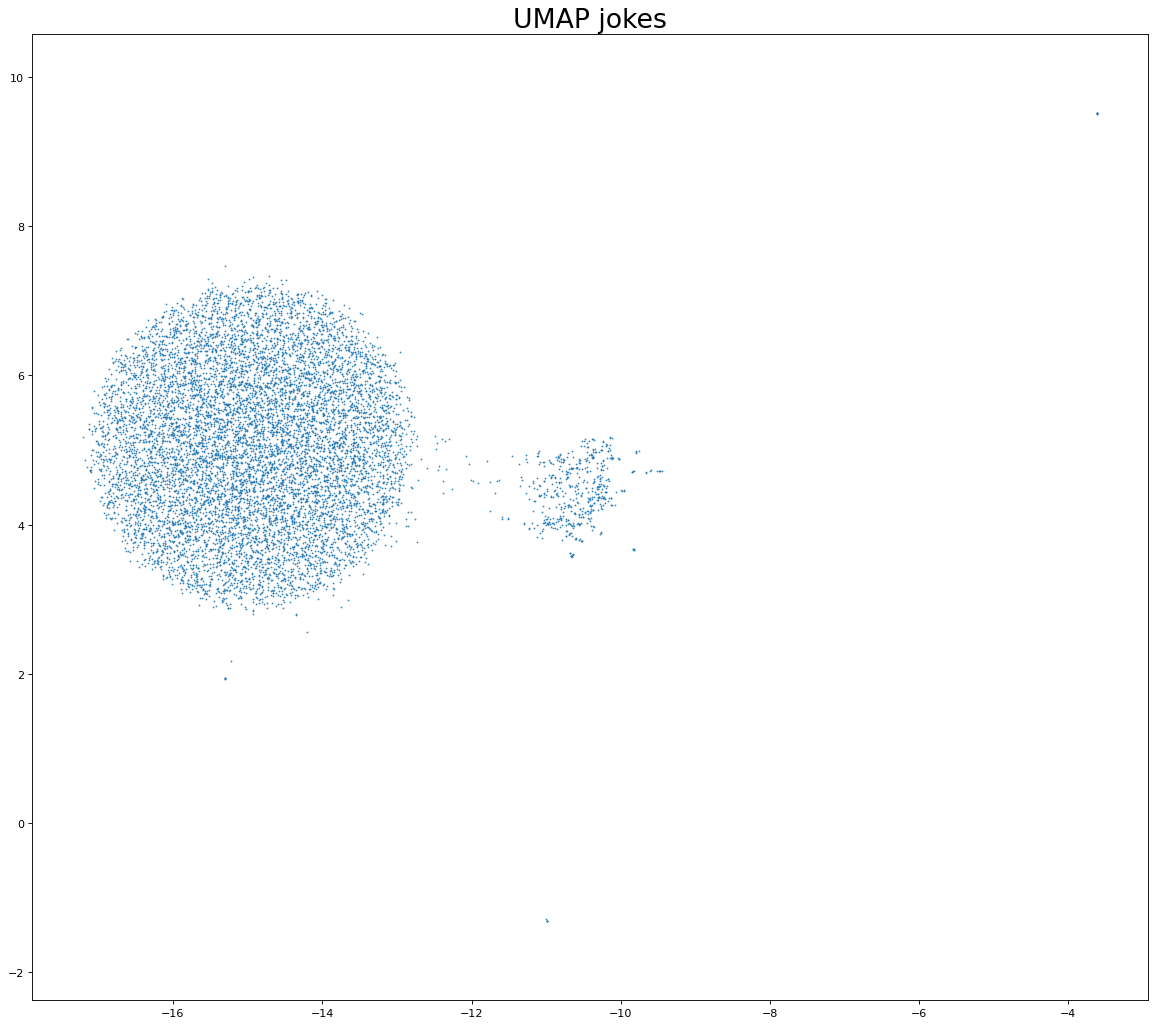

In [69]:
X = Analysis.makeFeaturesIDF(data_sub, ngram_range=(4,7))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

It becomes more homogenous when the ngram is on average higher.

Let's try keeping the lower ngrams too this time

### Same Data, wider ngram

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


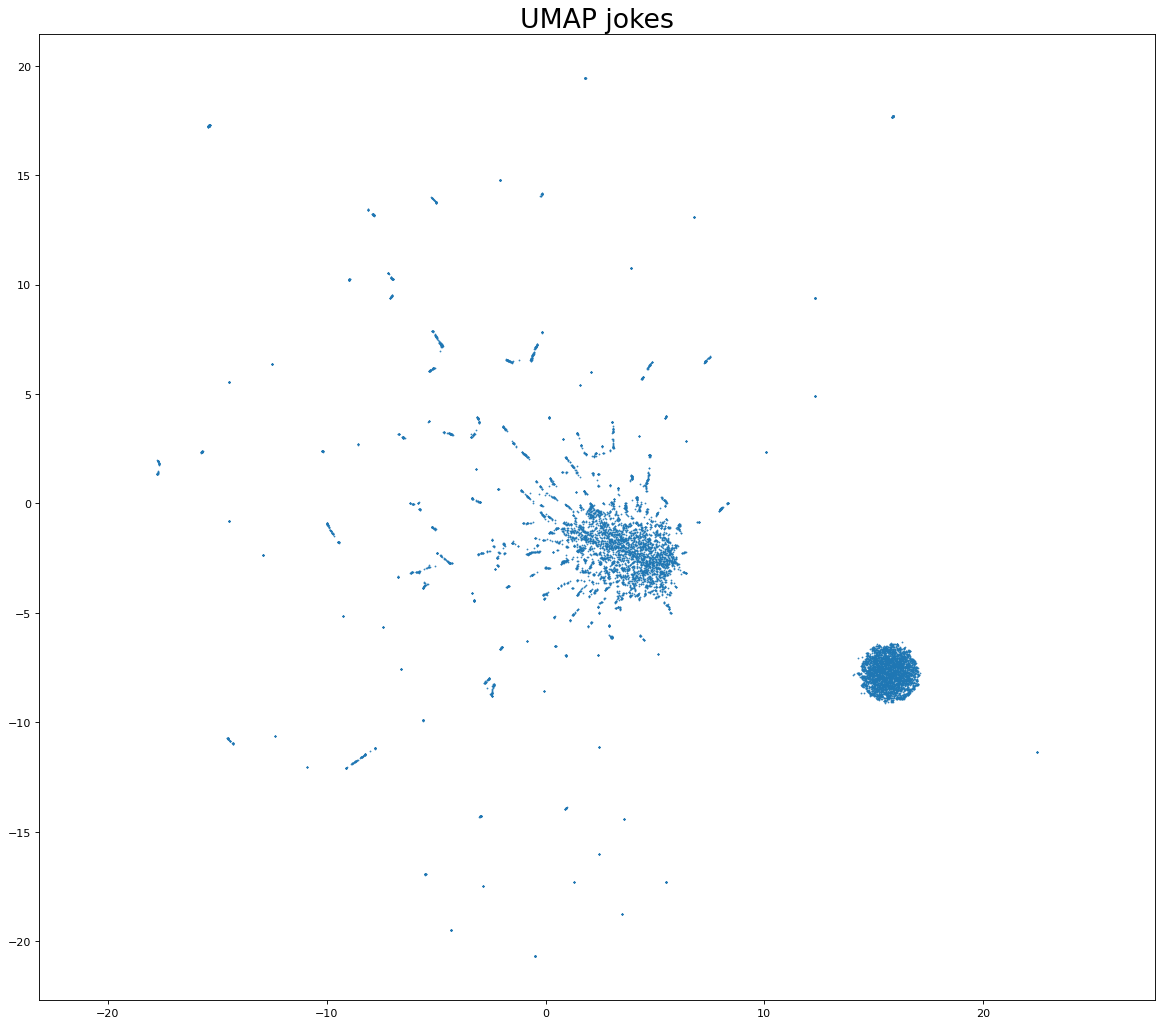

In [70]:
X = Analysis.makeFeaturesIDF(data_sub, ngram_range=(2,8))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

Still these two main groups. Could be a batch effect, but will need to eyeball it to truly know.

Either way, it appears increasing the ngram upperbound is not much better than the default

Let's try messing with the DF values.

### Same Data, different DF (1,2)


X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


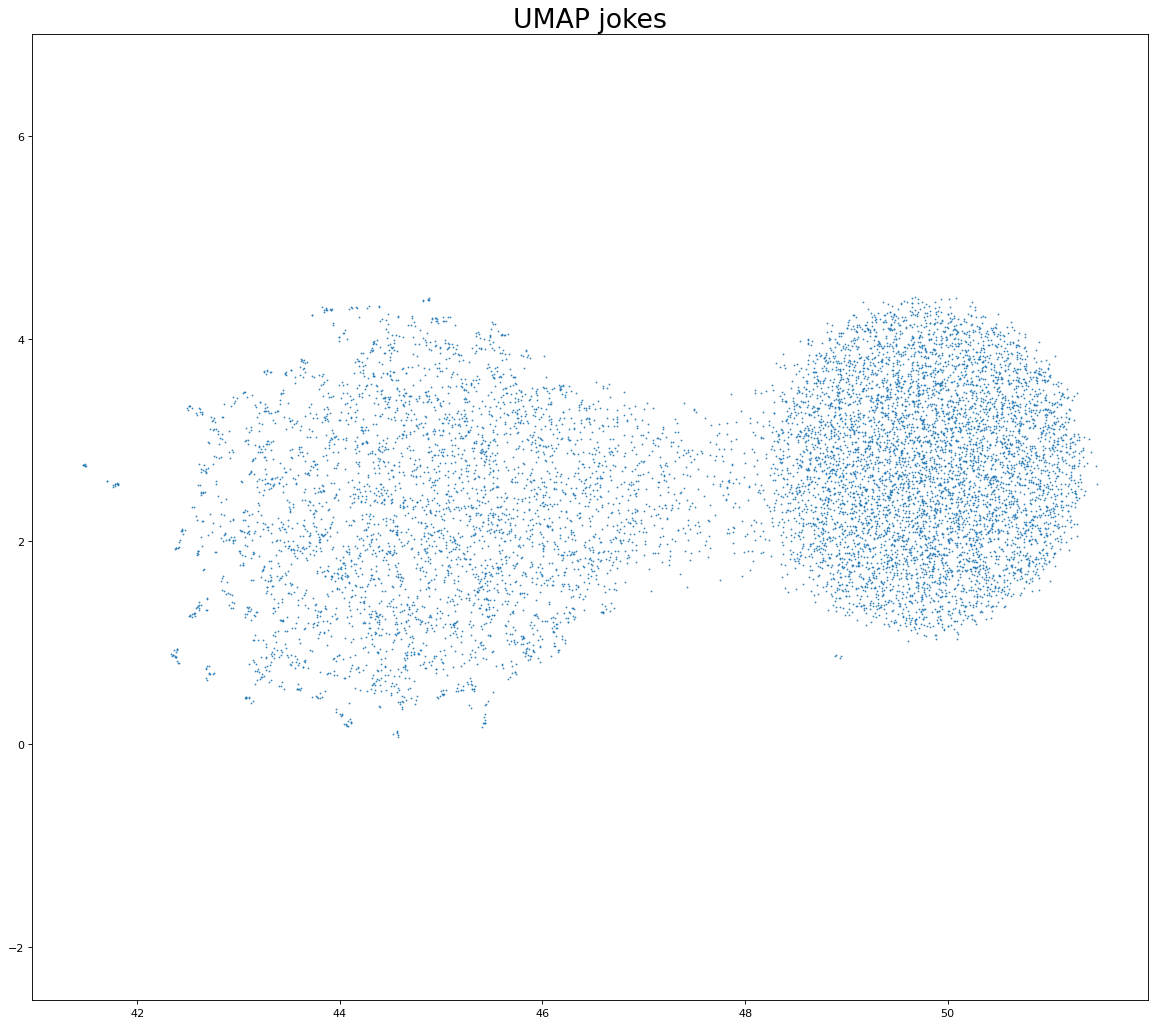

In [72]:
X = Analysis.makeFeaturesIDF(data_sub, df_range=(1,2))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

A bit more variation, though we lost the tight cluster. This looks like reduced sensitivity.

### Same Data, different df (2,0.1)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


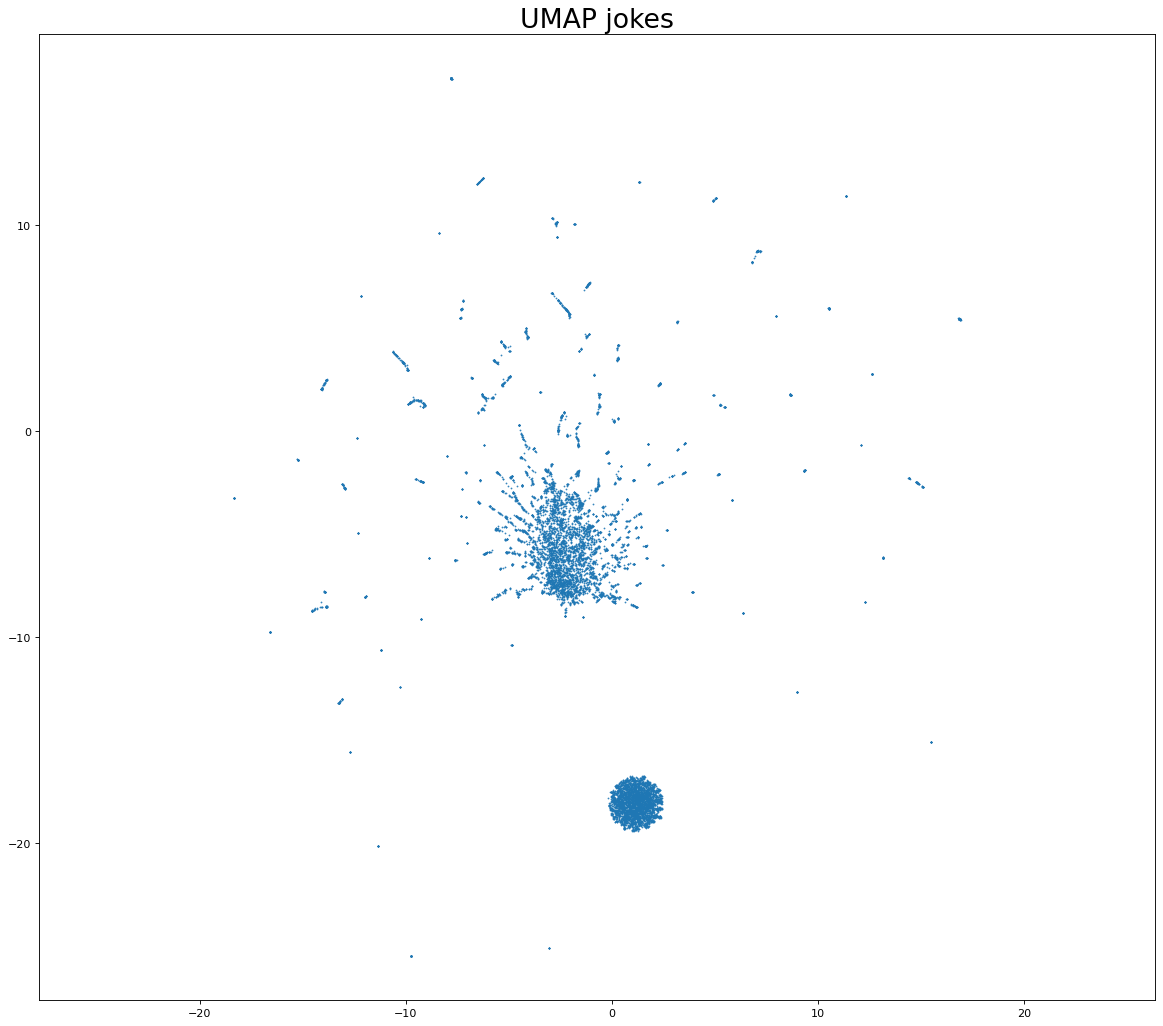

In [74]:
X = Analysis.makeFeaturesIDF(data_sub, df_range=(2,0.1))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


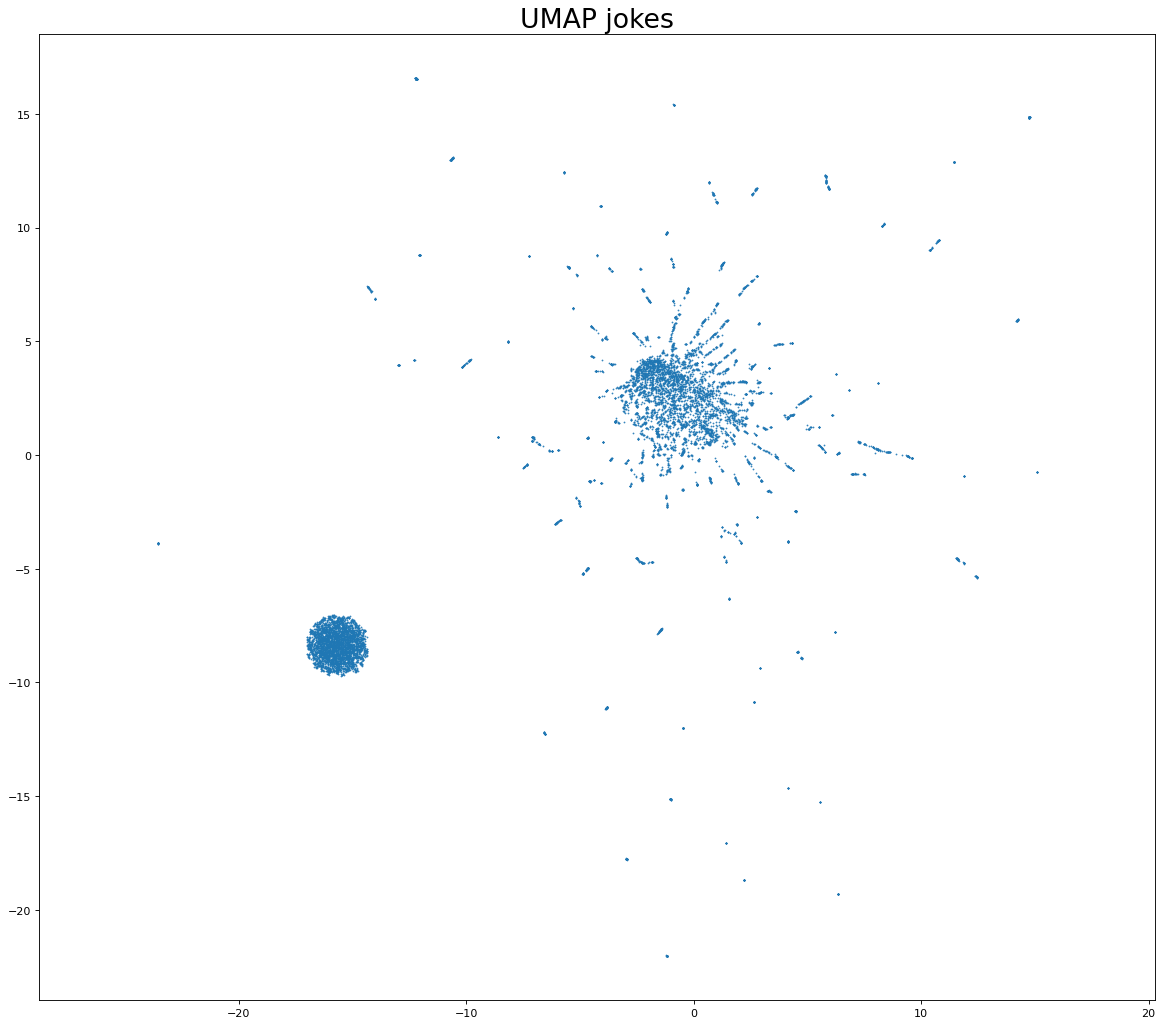

In [75]:
X = Analysis.makeFeaturesIDF(data_sub, df_range=(1,0.1))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

In [77]:
X = Analysis.makeFeaturesIDF(data_sub, df_range=(2,0.01))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


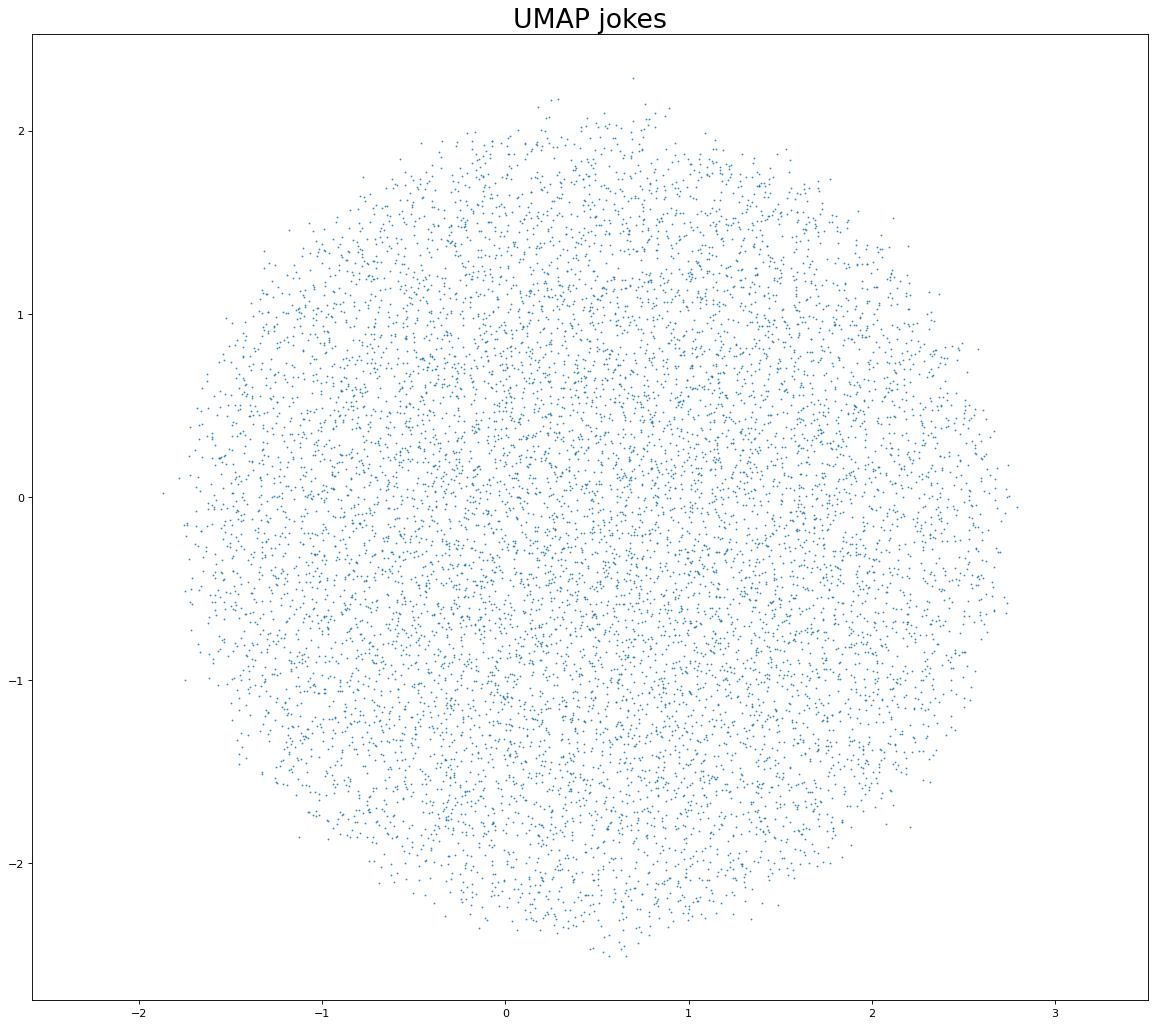

In [78]:
X = Analysis.makeFeaturesIDF(data_sub, df_range=(1,1))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

In [80]:
X, names = Analysis.makeFeaturesIDF(data_sub, df_range=(1,1), names=True)

In [86]:
names[-10:]

['youre immature',
 'youre immature im',
 'youre naked',
 'youre outside',
 'youre outside specialty',
 'youre shy',
 'youre shy say',
 'youre smiling',
 'youre smiling fact',
 'zoo guide']

******

I just learned that the min and max DF should be floats between 0 and 1 to represent their thresholds as proportion of documents. Too high a minimum and we are not specific enough, too low a maximum and we are too specific.

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


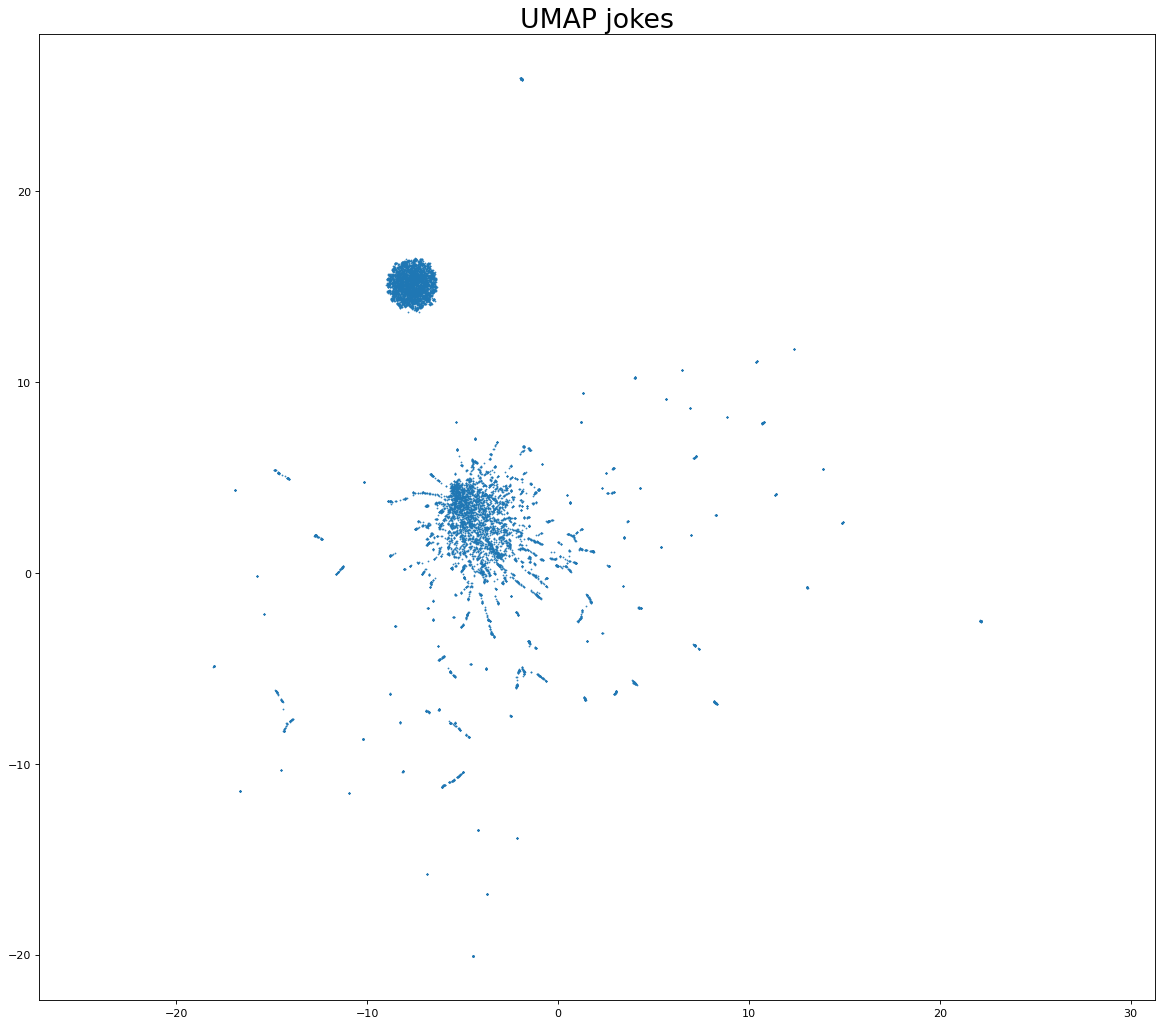

In [87]:
X = Analysis.makeFeaturesIDF(data_sub, df_range=(0.0001,0.5))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


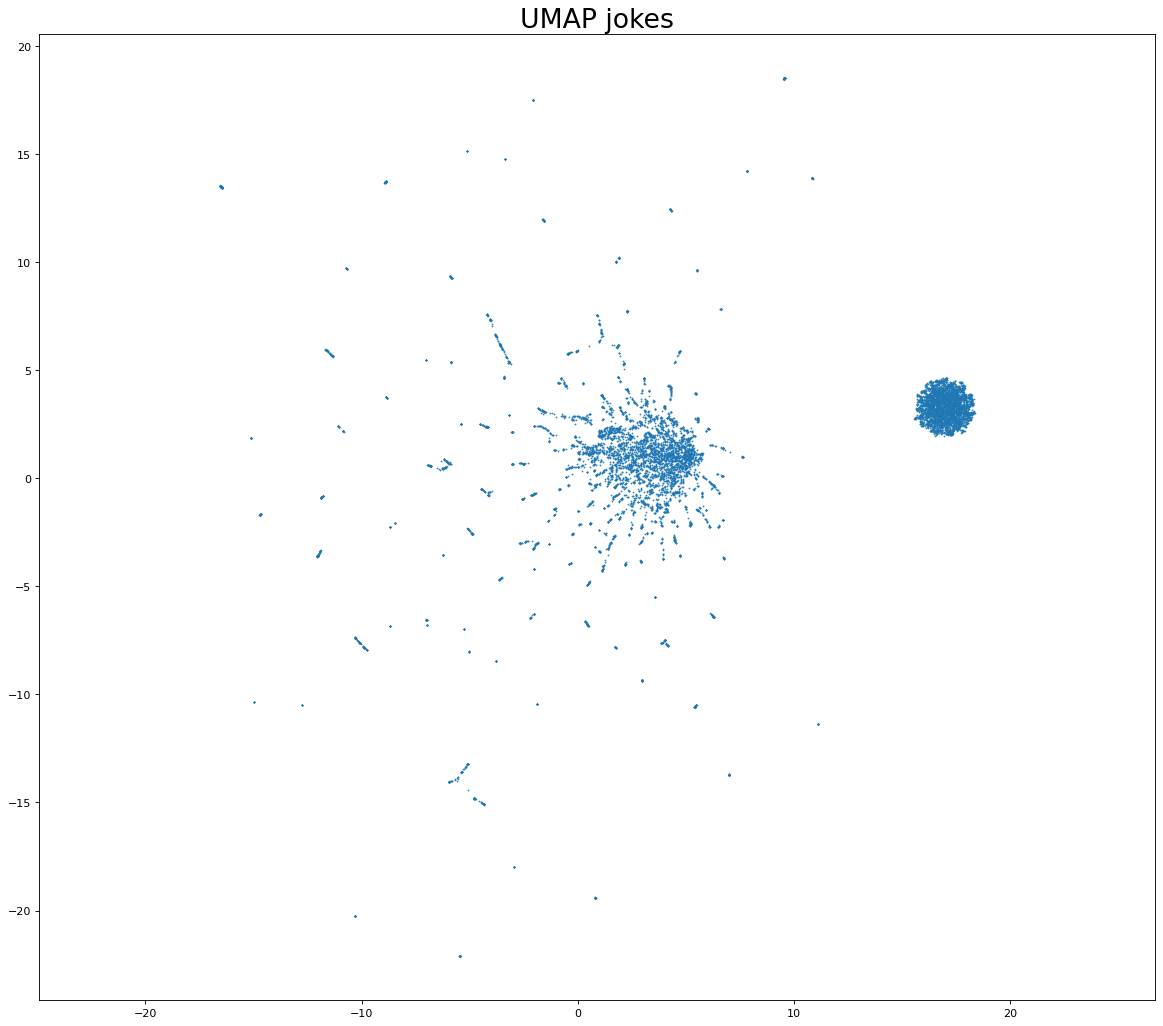

In [88]:
X = Analysis.makeFeaturesIDF(data_sub, df_range=(0.0000001,0.1))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


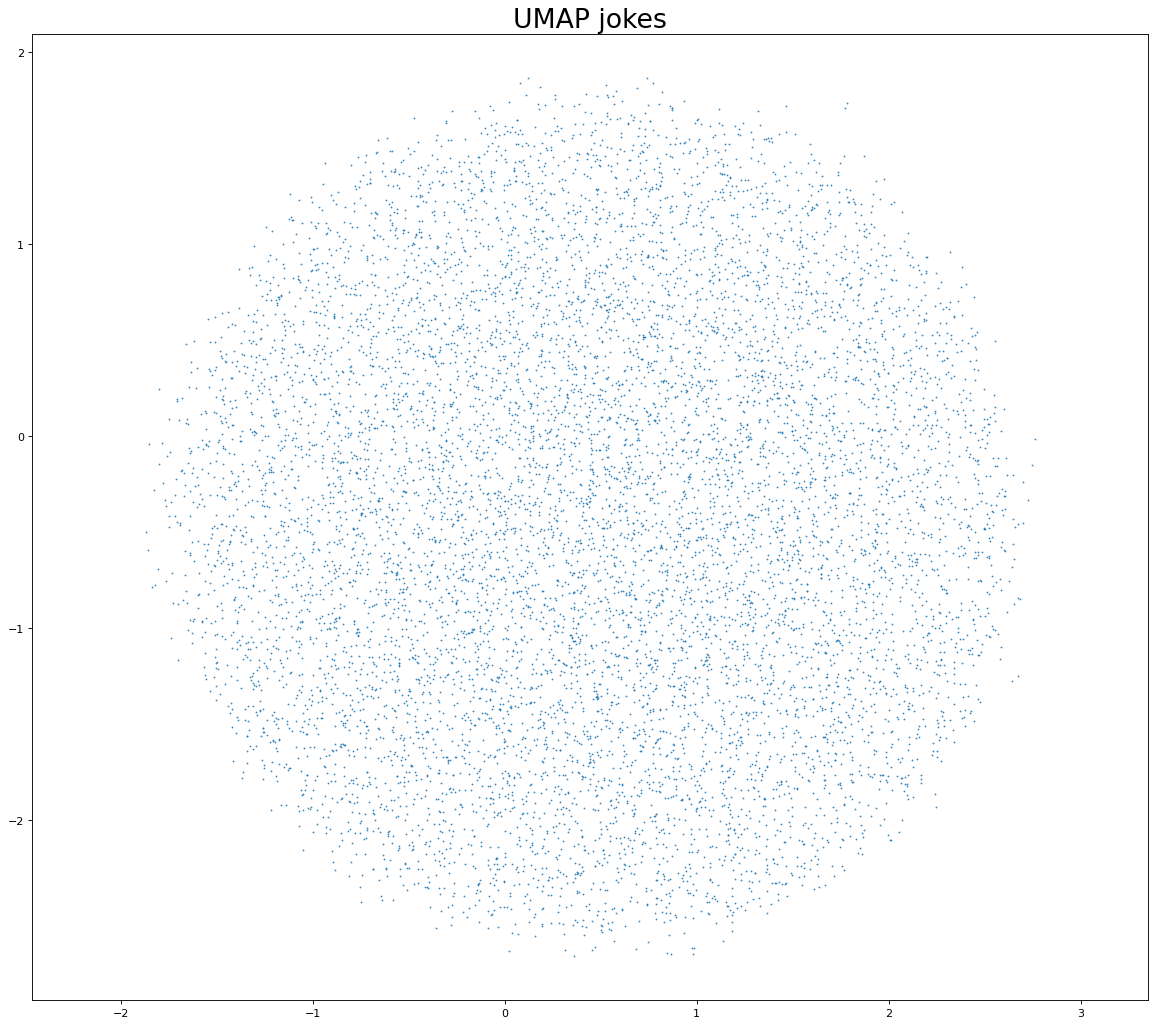

In [89]:
X = Analysis.makeFeaturesIDF(data_sub, df_range=(0.000000001,1))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

Playing with the df ranges we see that there are two main batches, or that jokes are in general a homogenous blob.

Given how complex this dataset is, and that jokes are often small variations on  one another that blend between many, it is actually *quite likely* that the shape of the embedding will always be homogenous. 

We should therefore expend more energy doing the actual clustering, than worrying about the embedding.

For now though, let's see if we can improve some of the more homogenous looking clustering by playing with the UMAP parameters

# UMAP more neighbours

According to [here](https://umap-learn.readthedocs.io/en/latest/parameters.html) more neighbours checked means more granularity. So let's try upping those parameters with the defaults for everything else.

In [3]:
with open('test.data','rb') as frick:
    table_sub, data_sub = pickle.load(frick)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


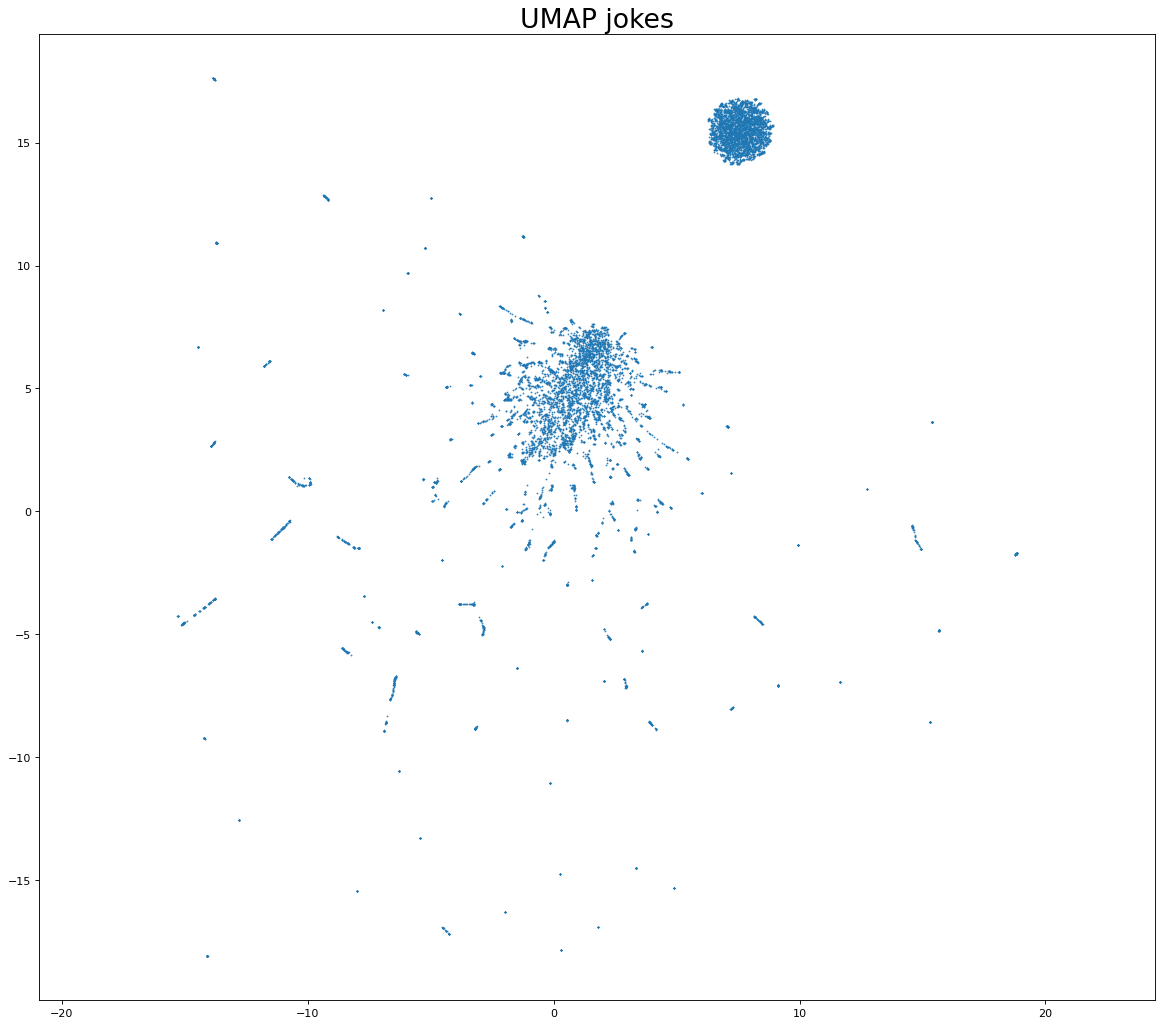

In [4]:
X = Analysis.makeFeaturesIDF(data_sub)
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux, 15, 0.1)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


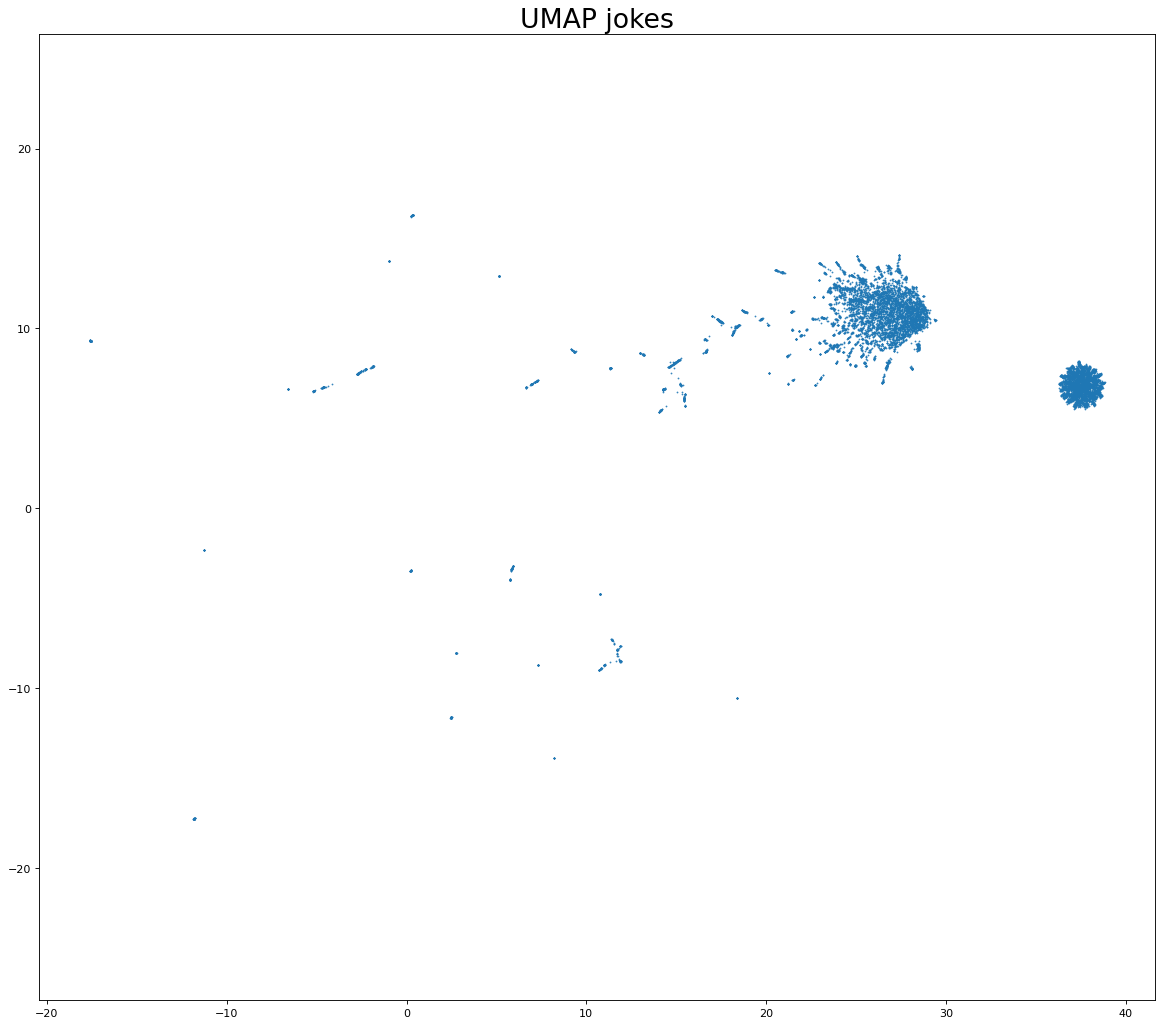

In [5]:
X = Analysis.makeFeaturesIDF(data_sub)
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux, 50, 0.1)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


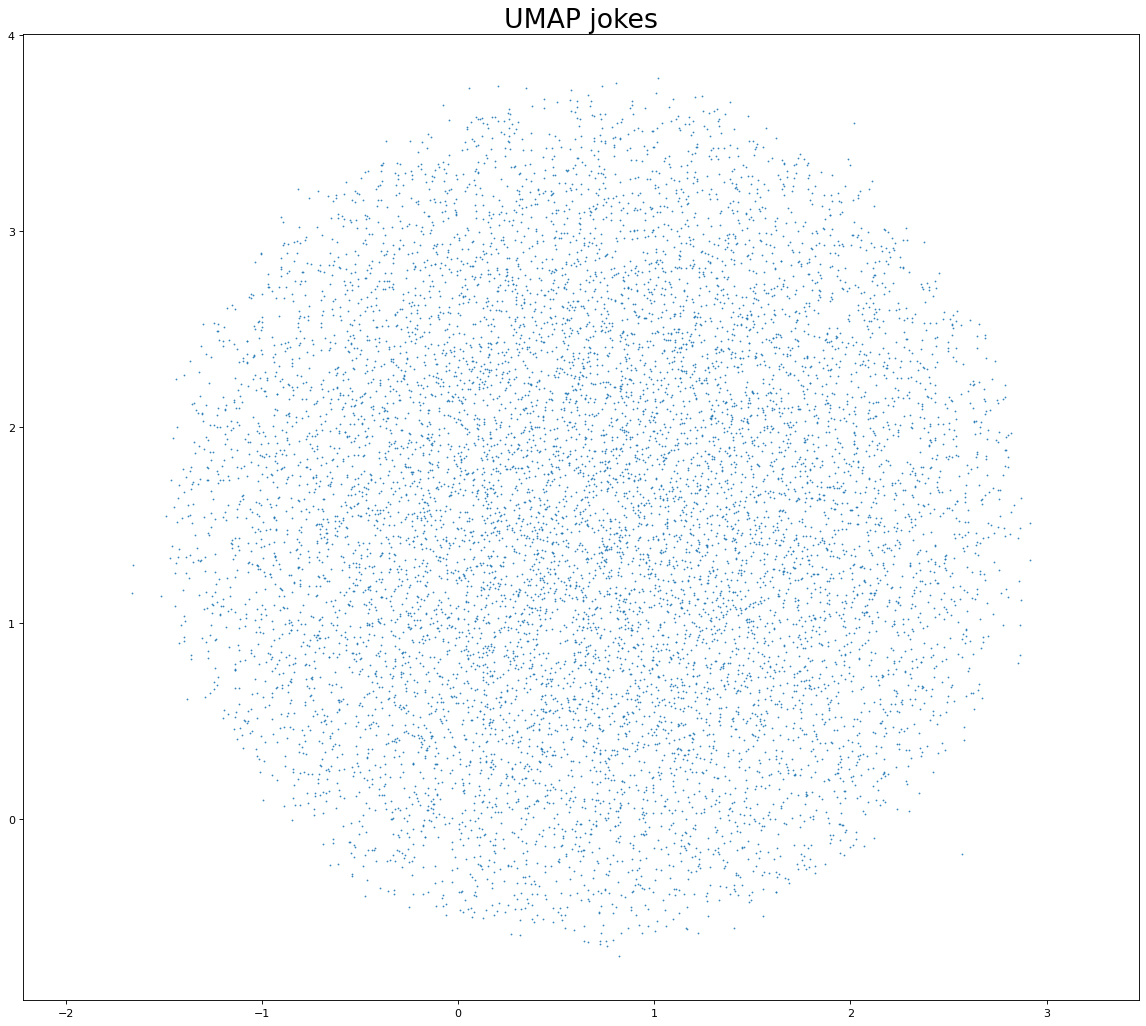

In [6]:
X = Analysis.makeFeaturesIDF(data_sub, df_range=(1,1))
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux, 50, 0.1)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


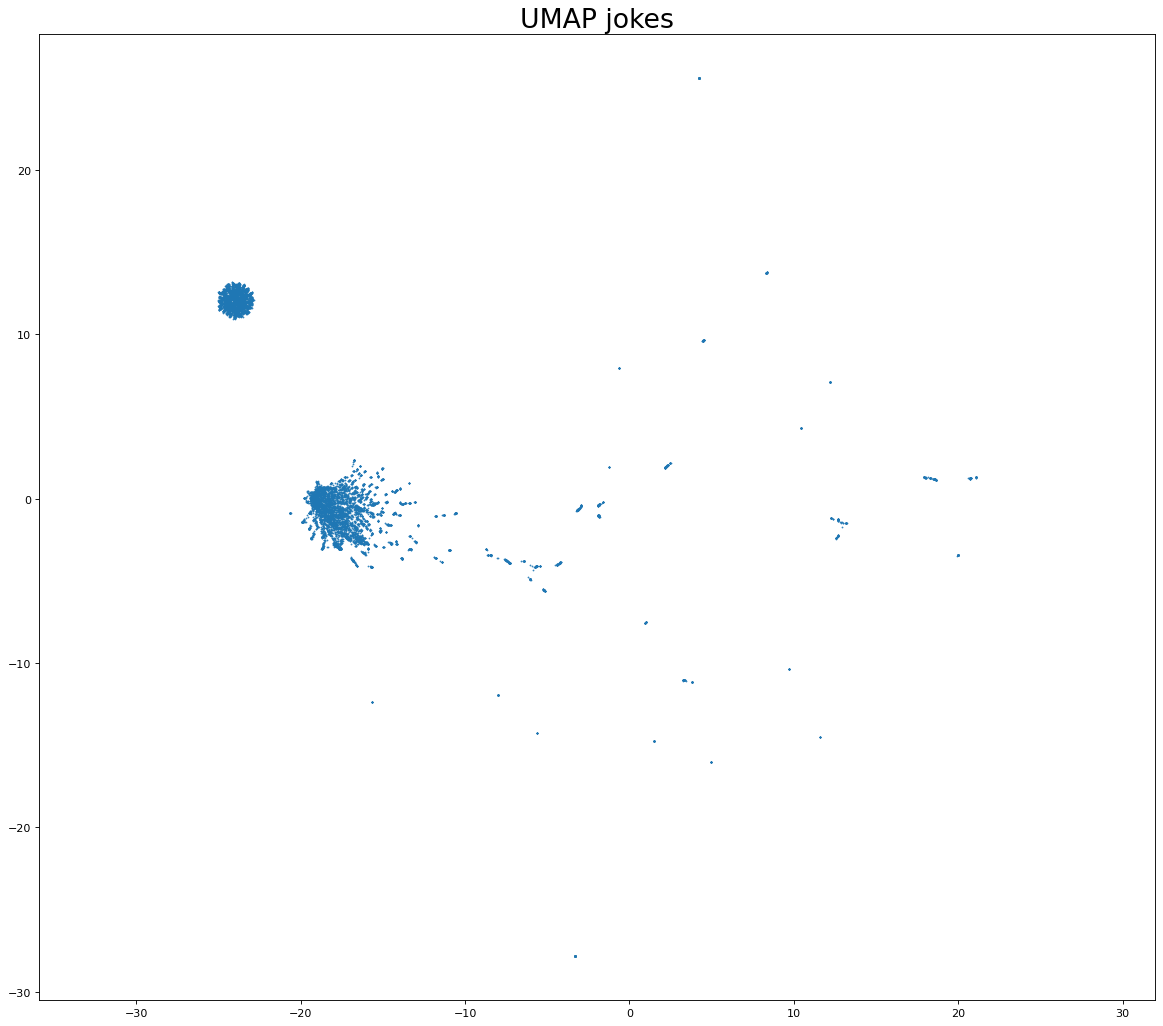

In [16]:
X = Analysis.makeFeaturesIDF(data_sub)
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux, 50, 0.001)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

In [15]:
X = Analysis.makeFeaturesIDF(data_sub)
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux, 50, 1)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


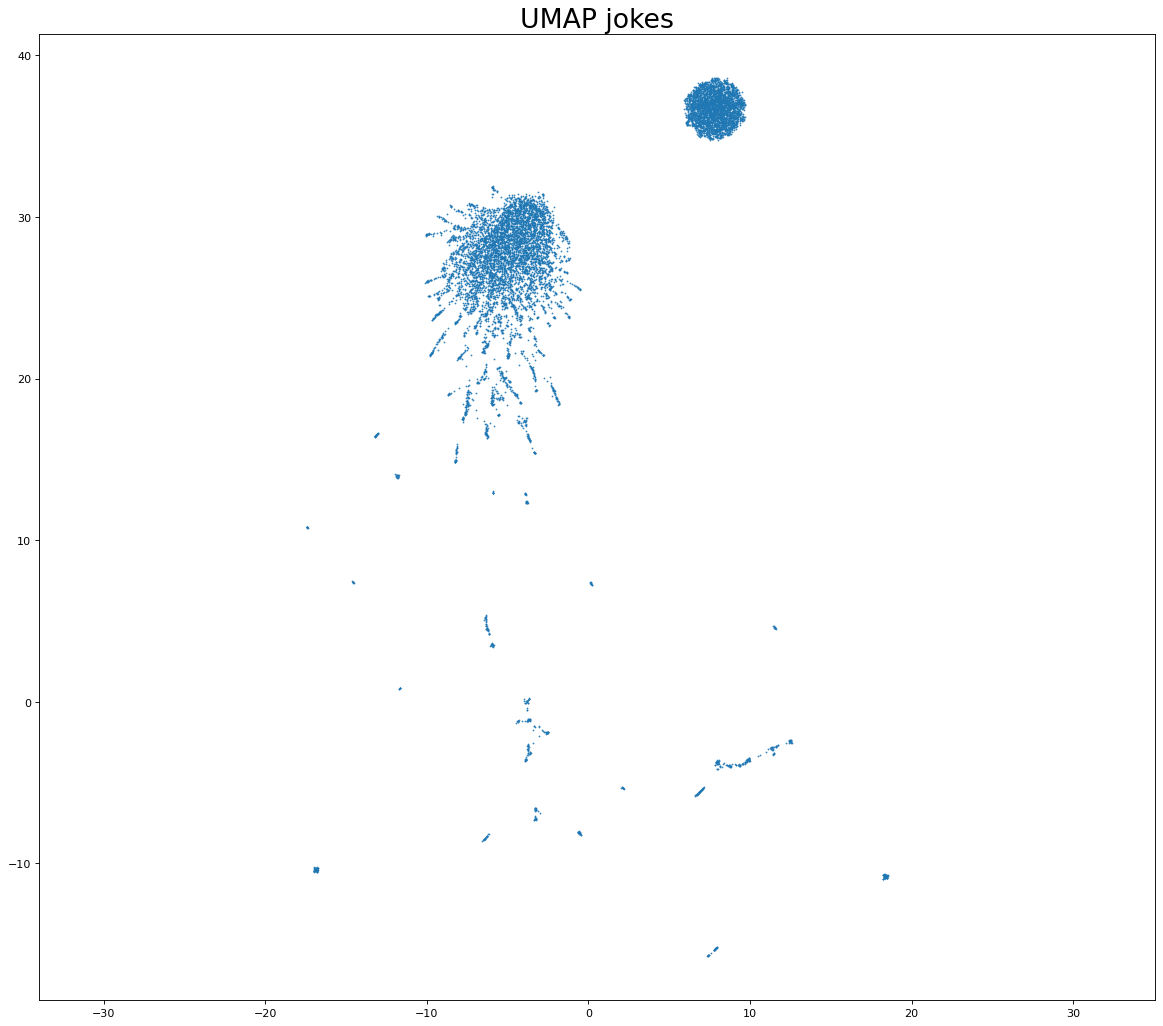

In [17]:
X = Analysis.makeFeaturesIDF(data_sub)
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux, 50, 0.5)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


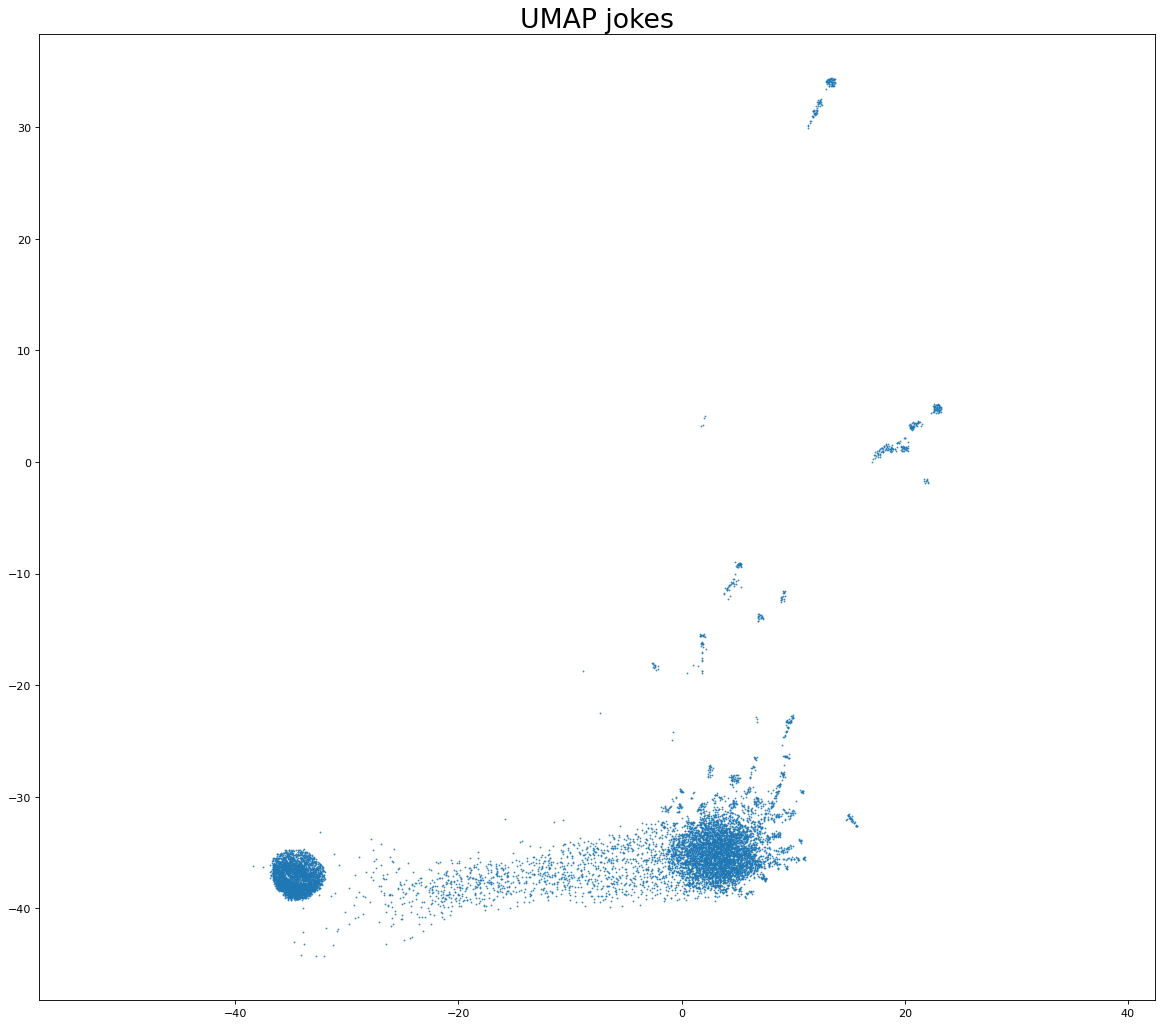

In [18]:
X = Analysis.makeFeaturesIDF(data_sub)
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux, 1000, 1)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

X.shape (10000, 10000)
X_redux.shape (10000, 50)
embedding.shape (10000, 2)


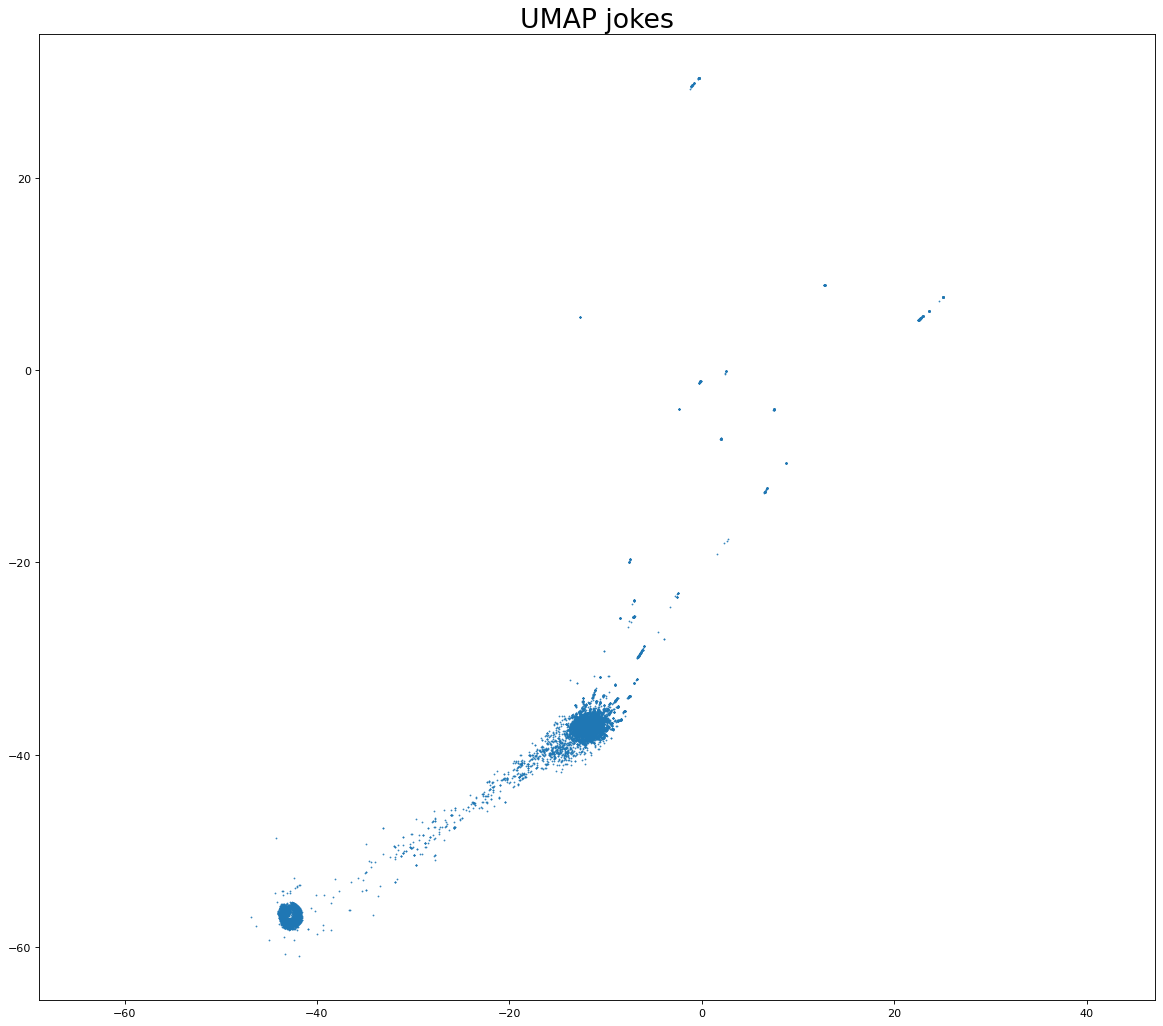

In [20]:
# min_dist if smaller gives smaller clumps.
X = Analysis.makeFeaturesIDF(data_sub)
X_redux = Analysis.dimensionReduction(X)
embed = Analysis.perform2DEmbed(X_redux, 1000, 0.1)
fig, ax = Analysis.plotEmbed(embed, "UMAP jokes", point=0.3)

Too fine, with 0.1. It looks like we have the best embedding when we up the number of neighbours and use a high min distance.